In [1]:
import os, sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

from datasets.BavarianCrops_Dataset import *
from datasets.dataset_utils import *
from datasets.sequence_aggregator import *

from explainability_analysis.util import *
from explainability_analysis.crop_spectral_signature_analysis import *

num_classes = 12
home_path = str(Path.home())
dataset_folder = "C:/Users/datasets/BavarianCrops"
model_root_path = "C:/Users/results/{}_classes/weekly_average/obs_aq_date/layers=3,heads=4,emb_dim=128/".format(num_classes)

class_mapping = os.path.join(dataset_folder, "classmapping{}.csv".format(num_classes))

predictions_path = os.path.join(model_root_path, "predictions")
predictions = np.loadtxt(
    os.path.join(predictions_path, "predicted_vs_true.csv"),
    skiprows = 1,
    delimiter = ",",
    dtype = np.uint)
labels_classes = get_labels_for_parcel_ids(predictions[:,0], predictions_path)
predictions = pd.DataFrame(predictions, columns = ["PARCEL_ID", "LABEL", "PREDICTED"])
predictions["CLASS_NAME"] = labels_classes
_,_,test_dataset = get_partitioned_dataset(dataset_folder, class_mapping, WeeklySequenceAggregator())
spectral_indices_per_parcel = test_dataset.calculate_spectral_indices()

C:\Users\Ivica Obadic\PycharmProjects\EOExplainability
Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops\npy\classmapping12.csv\blocks\holl\train
loaded 20858 samples
Dataset C:/Users/datasets/BavarianCrops. region holl. partition train. X:20858x(71, 16), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops\npy\classmapping12.csv\blocks\holl\valid
loaded 3909 samples
Dataset C:/Users/datasets/BavarianCrops. region holl. partition valid. X:3909x(144, 16), y:(3909,) with 12 classes
Initializing BavarianCropsDataset test partition in holl
read 12 classes
precached dataset files found at C:/Users/datasets/BavarianCrops\npy\classmapping12.csv\blocks\holl\test
loaded 9583 samples
Dataset C:/Users/datasets/BavarianCrops. region holl. partition test. X:9583x(144, 16), y:(9583,) with 12 classes
I

In [ ]:
aggregation_time_frame = "WEEK"
average_crop_type_signature = calc_spectral_signature_per_class_and_time_frame(spectral_indices_per_parcel, aggregation_time_frame)

Concatenating all observations into a single dataframe


In [ ]:
class_data = average_crop_type_signature["CLASS"]
week_data = average_crop_type_signature["WEEK"]
ndvi_data = average_crop_type_signature["NDVI"]
ndvi_data.rename(columns={"mean":"NDVI MEAN", "var": "NDVI Variance"}, inplace=True)
ndvi_result_mean = pd.concat([class_data, week_data, ndvi_data["NDVI MEAN"]], axis=1)
ndvi_result_mean = ndvi_result_mean.pivot(index="CLASS", columns=aggregation_time_frame, values='NDVI MEAN')
print(ndvi_result_mean)
ndvi_result_variance = pd.concat([class_data, week_data, ndvi_data["NDVI Variance"]], axis=1)
ndvi_result_variance = ndvi_result_variance.pivot(index="CLASS", columns=aggregation_time_frame, values='NDVI Variance')
print(ndvi_result_variance)

In [ ]:
fig, axs = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
ax1 = sns.heatmap(ndvi_result_mean, cmap="BuGn", ax=axs[0])
ax1.set_title("Average NDVI index", fontsize=12)
ax1.tick_params(bottom=False, top=False, left=False)

ax2 = sns.heatmap(ndvi_result_variance, ax=axs[1])
ax2.set_title("Variance of the NDVI index", fontsize=12)
ax2.tick_params(bottom=False, top=False, left=False)

In [3]:
print(average_crop_type_signature)
NEAR_INFRARED_BAND = "B8"
VISIBLE_RED_BAND = "B4"
BANDS = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', VISIBLE_RED_BAND, 'B5', 'B6', 'B7', NEAR_INFRARED_BAND,
       'B8A', 'B9', "WEEK", "CLASS"]
average_crop_type_signature = average_crop_type_signature[BANDS]
print(average_crop_type_signature)

            CLASS        WEEK  YEAR                MONTH                   \
                               mean median var      mean median       var   
0            corn  2018-01-01  2018   2018   0   1.00000      1  0.000000   
1            corn  2018-01-08  2018   2018   0   1.00000      1  0.000000   
2            corn  2018-01-15  2018   2018   0   1.00000      1  0.000000   
3            corn  2018-01-22  2018   2018   0   1.00000      1  0.000000   
4            corn  2018-01-29  2018   2018   0   1.76903      2  0.177674   
..            ...         ...   ...    ...  ..       ...    ...       ...   
619  winter wheat  2018-11-26  2018   2018   0  11.00000     11  0.000000   
620  winter wheat  2018-12-03  2018   2018   0  12.00000     12  0.000000   
621  winter wheat  2018-12-10  2018   2018   0  12.00000     12  0.000000   
622  winter wheat  2018-12-17  2018   2018   0  12.00000     12  0.000000   
623  winter wheat  2018-12-24  2018   2018   0  12.00000     12  0.000000   

            CLASS        B1       B10       B11       B12        B2        B3  \
22           corn  0.184678  0.009288  0.257548  0.170467  0.163354  0.157751   
334  summer wheat  0.162642  0.010254  0.198111  0.111200  0.135541  0.125094   

           B4        B5        B6        B7        B8       B8A        B9  
22   0.151208  0.176398  0.285865  0.342097  0.325659  0.366621  0.096342  
334  0.105821  0.135259  0.272241  0.349921  0.335031  0.380050  0.090273  
           CLASS BAND  AVG_REFLECTANCE
0           corn   B1         0.184678
1   summer wheat   B1         0.162642
2           corn  B10         0.009288
3   summer wheat  B10         0.010254
4           corn  B11         0.257548
5   summer wheat  B11         0.198111
6           corn  B12         0.170467
7   summer wheat  B12         0.111200
8           corn   B2         0.163354
9   summer wheat   B2         0.135541
10          corn   B3         0.157751
11  summer wheat   B3         0.125094
12          corn   B4

Text(0.5, 1.0, 'Average Crop-Type Spectral Signature for 2018-06-04')

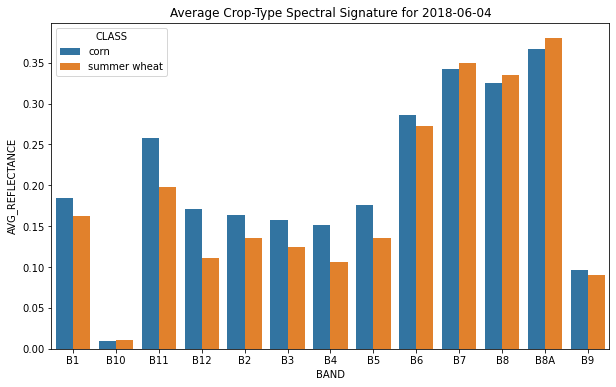

In [10]:
SPECTRAL_BANDS = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', VISIBLE_RED_BAND, 'B5', 'B6', 'B7', NEAR_INFRARED_BAND,
       'B8A', 'B9']

average_crop_type_signature = average_crop_type_signature.loc[average_crop_type_signature['WEEK'] == "2018-06-04"]
average_crop_type_signature = average_crop_type_signature[average_crop_type_signature["CLASS"].isin(["rapeseed", "summer oat"])]
result = average_crop_type_signature["CLASS"]
for i in range(0, len(SPECTRAL_BANDS)):
    band_result = pd.DataFrame({BANDS[i]: average_crop_type_signature[BANDS[i]]["mean"]})
    result = pd.concat([result, band_result], axis=1)

print(result)
spectral_signature_in_a_week_long = result.melt(id_vars="CLASS", value_vars=SPECTRAL_BANDS, var_name="BAND", value_name = "AVG_REFLECTANCE")
print(spectral_signature_in_a_week_long)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = sns.barplot(x="BAND", y="AVG_REFLECTANCE", hue="CLASS", data=spectral_signature_in_a_week_long)
ax1.set_title("Average Crop-Type Spectral Signature for 2018-06-04")